In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read the file
df=pd.read_csv("C:/7-clustering/Assignments/EastWestAirlines.csv")

In [4]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [5]:
#step 1:Basic OVerview and Data Inspection
#take starting 5 rows and all columns so that to understand what kind of data each column has
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
df.tail()#it gives the last 5 rows data 

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


In [7]:
#see all the labels of all the columns
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

so the above data is about the customer's in eastwestairlines.

### 1. Business Problem 
#### 1.1.	What is the business objective?
the business approach of this problem is to study the customers taking the flights or they having the loyalty towards this airlines,to group or cluster the customers on the basis of their behaviour of spending the money ,customers who can afford this ,or who keeps on frequently using this airlines.Also this will help to understand the measure to be taken to increase the customers aligned more with this airlines.
#### 1.2.	Are there any constraints?
COnstaints maybe the nullvalues which cannot be deleted completely as some of the details are very crucial or sometimes the incomplete data also can act constraints.

#### 2. Work on each feature of the dataset to create a data dictionary as displayed in the below image:
~all the data here is in integer form 
~ID# - Customen's UNique Identity number. -Useful for tracking particular one
~Balance-Total miles travelled-useful for checking the distance travelled by each

In [8]:
#will check the shape of the dataset we have ie 
#the total number of rows and columns we have
df.shape

(3999, 12)

In [9]:
df.info()#it gives us the number of non-null values,datatype for each column 
#also how many records are there in the dataset ie no of rows & columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


Here we get all the data as integer type

to get all the count, mean, standard deviation, min, 25th percentile, 50th percentile (median), 75th percentile, and max for each numerical column. 
# Summary statistics

In [10]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


here we can conclude that there is the huge difference between min max mean median .so the data need to be normalized.

 df.describe() in pandas, it provides a summary of various statistics of your data, including count, mean, standard deviation (std), min, 25th percentile (Q1), median (50th percentile), 75th percentile (Q3), and max.

 # Mean vs. Median:
If the mean and median are significantly different, this suggests that the data may be skewed (either left or right skewed) and not normally distributed. For a normal distribution, the mean and median should be close to each other.

# Skewness (Indirectly Observed):
If the min and max values are far from the mean in an uneven way (e.g., the difference between the mean and min is much greater than the difference between the mean and max, or vice versa), this suggests skewness in the data. A highly skewed dataset is not normally distributed.

# Range and Percentiles:
If the difference between Q1 and Q3 (interquartile range) is small compared to the overall range (min to max), or if the range is very wide, this could indicate the presence of outliers or skewness.


# Normalizing the Data
To address the large differences between min, max, median, and mode, and to normalize the data, you can consider the following techniques:

Log Transformation: Apply a logarithmic transformation to reduce the skewness of the data. This is especially useful for data with a right skew.

df['log_values'] = np.log1p(df['values'])
Z-Score Normalization (Standardization): This method transforms the data to have a mean of 0 and a standard deviation of 1. It’s useful when you want to compare data on the same scale.

from scipy.stats import zscore
df['zscore_values'] = zscore(df['values'])
Min-Max Scaling: Rescale the data to a fixed range, typically [0, 1].

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['minmax_values'] = scaler.fit_transform(df[['values']])
These methods help to reduce the impact of outliers, minimize skewness, and make the data more suitable for further analysis or modeling.

# Summary of When to Use Each:
Min-Max Scaling: Use when you need a uniform scale for your data within a fixed range and there aren’t extreme outliers. Ideal for algorithms that are sensitive to the absolute differences in magnitude.
Z-Score Normalization: Use when you need to normalize data with different means and variances, especially for distance-based algorithms or when outliers are present.
Log Transformation: Use when your data is highly skewed, and you need to reduce the influence of large outliers or compress a wide range of values.

In [11]:
df['ID#'].value_counts()#checkwhat kind of data each column has.It hasall the unique values

ID#
1       1
2691    1
2678    1
2679    1
2680    1
       ..
1351    1
1352    1
1353    1
1354    1
4021    1
Name: count, Length: 3999, dtype: int64

In [12]:
df['Balance'].value_counts()

Balance
1000     10
500       5
2000      5
1500      4
5000      3
         ..
9554      1
30130     1
12665     1
9860      1
3016      1
Name: count, Length: 3904, dtype: int64

In [13]:
df['Qual_miles'].value_counts()

Qual_miles
0       3773
1000      17
500       15
967        4
888        4
        ... 
4116       1
1388       1
1896       1
3692       1
1005       1
Name: count, Length: 164, dtype: int64

In [14]:
df['cc1_miles'].value_counts()

cc1_miles
1    2289
3     613
4     525
5     288
2     284
Name: count, dtype: int64

In [15]:
df['cc1_miles'].unique()#it gives us unique values in the form of list 

array([1, 4, 3, 2, 5], dtype=int64)

In [16]:
df['cc1_miles'].nunique()

5

In [17]:
df['cc2_miles'].value_counts()

cc2_miles
1    3956
2      28
3      15
Name: count, dtype: int64

In [18]:
df['cc3_miles'].value_counts()

cc3_miles
1    3981
4       6
5       5
3       4
2       3
Name: count, dtype: int64

In [19]:
df['Bonus_miles'].value_counts()

Bonus_miles
0        475
500       66
1000      42
100       27
1500      25
        ... 
11981      1
28904      1
9850       1
52449      1
25447      1
Name: count, Length: 2734, dtype: int64

In [20]:
df['Bonus_trans'].value_counts()

Bonus_trans
0     475
14    262
3     250
13    231
15    212
1     212
4     190
16    189
12    148
17    140
5     126
18    125
6     115
11    108
2     104
8     100
10     97
19     97
9      91
7      88
20     85
21     69
22     63
24     41
26     41
23     35
25     34
27     32
28     28
32     26
29     23
31     21
30     17
34     15
39     12
35     11
37     11
38     10
33      8
41      7
43      7
36      6
45      5
40      4
53      4
51      4
44      3
50      3
47      3
46      2
65      2
49      2
55      1
52      1
58      1
86      1
68      1
Name: count, dtype: int64

In [21]:
df['Flight_trans_12'].value_counts()

Flight_trans_12
0     2723
1      469
2      242
3      132
4       97
5       58
6       43
9       32
8       31
7       30
11      19
12      16
10      16
16      11
15       9
18       8
17       8
23       7
14       7
13       7
29       5
26       5
28       4
20       4
24       4
53       2
19       2
36       1
45       1
27       1
31       1
21       1
25       1
22       1
46       1
Name: count, dtype: int64

In [22]:
df['Flight_miles_12mo'].value_counts()

Flight_miles_12mo
0        2723
500       195
1000       53
150        51
100        49
         ... 
12400       1
2729        1
4309        1
683         1
79          1
Name: count, Length: 343, dtype: int64

In [23]:
df['Days_since_enroll'].value_counts()

Days_since_enroll
8296    38
8289    33
8228    15
7467     7
1597     7
        ..
4770     1
4672     1
4615     1
4566     1
1398     1
Name: count, Length: 2820, dtype: int64

In [24]:
df['Award?'].value_counts()

Award?
0    2518
1    1481
Name: count, dtype: int64

# 3.Missing values

In [25]:
#now lets check for the null value data in the given dataset

"""it will  return the count of null values in each column but if the column 
contains 0 then it is not considered in null value if the data is empty or
NULL then only its count will be considered """
df.isnull().sum()
#in this case no missing values are there so it returns 0

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [26]:
#if any null or missing values are there we will drop that row .
df.dropna()
#also we can store this value bcoz we will be using there after a new data 
#so df_new=df.dropna() we can use this aswell 

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [27]:
#if missing values are there we can either drop that rows or fill that value according to you
#in general ,we fill the missing values with 0
df['Balance'].fillna(0, inplace=True)
#in this case there are no null values present 

C:\Users\Vaishnavi\AppData\Local\Temp\ipykernel_10996\4155522569.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Balance'].fillna(0, inplace=True)


In [28]:
# Option 2: Fill missing values with mean/median/mode or a specific value
df['Balance'].fillna(df['Balance'].mean(), inplace=True)  # Example for mean imputation

C:\Users\Vaishnavi\AppData\Local\Temp\ipykernel_10996\595913372.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Balance'].fillna(df['Balance'].mean(), inplace=True)  # Example for mean imputation


# Data VIsualization for EDA

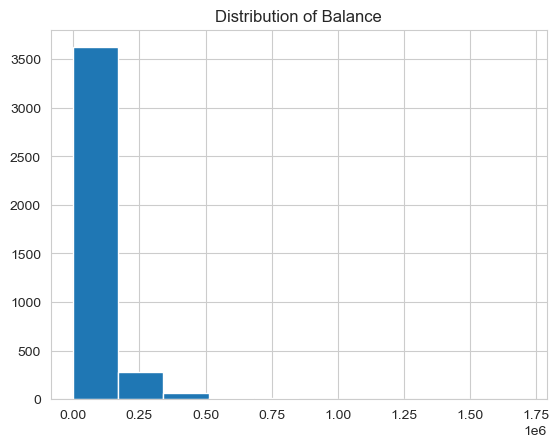

In [79]:
# 2. Univariate Analysis
df['Balance'].hist()
plt.title('Distribution of Balance')
plt.show()#lets check the histogram of the given data
#it visualizes the distribution of a numerical feature.
#on y-axis it the number of total data ie the rows 3999
#on x-axis is the values at each row of balance data

<Axes: >

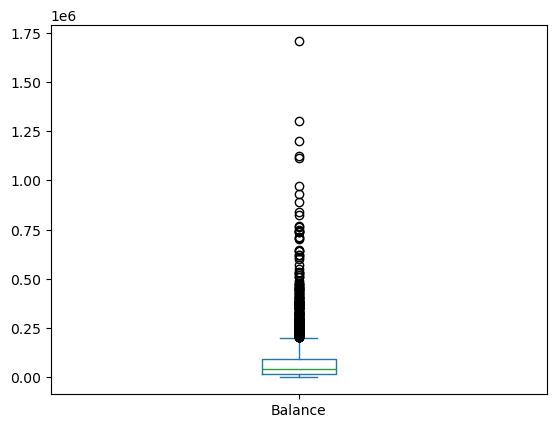

In [30]:
#check for the box plot.
#this will let us know that if any outlier is present there or not
df['Balance'].plot(kind='box')


there are many outliers present here

In [31]:
# Identify outliers using IQR
Q1 = df['Balance'].quantile(0.25)
Q3 = df['Balance'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as those outside 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered = df[(df['Balance'] >= lower_bound) & (df['Balance'] <= upper_bound)]
df_filtered

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


<Axes: >

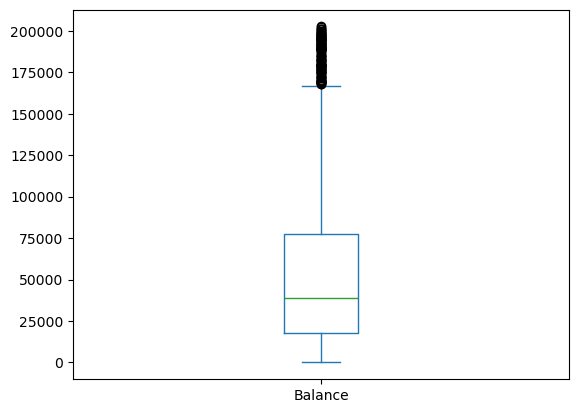

In [32]:
df_filtered['Balance'].plot(kind='box')
#we are able to see that outliers are not removed so we will go for minmaxscaler

<Axes: xlabel='Flight_miles_12mo', ylabel='Balance'>

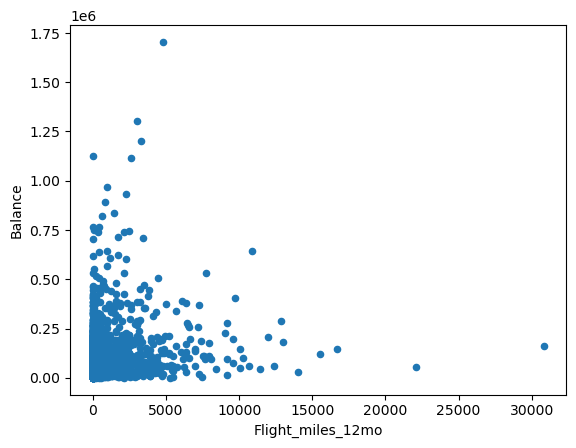

In [33]:
df.plot(kind='scatter', x='Flight_miles_12mo', y='Balance')
#this will help us to understand how data is being scatters and what is the relation between the two columns
#relationship between them will help us to understand that
#balance- the customer's current balance, which can be crucial for understanding their financial status 
#Flight_miles_12mo-This column represents the number of flight miles accumulated by the customer in the past 12 months. 

<Axes: xlabel='Balance', ylabel='Bonus_miles'>

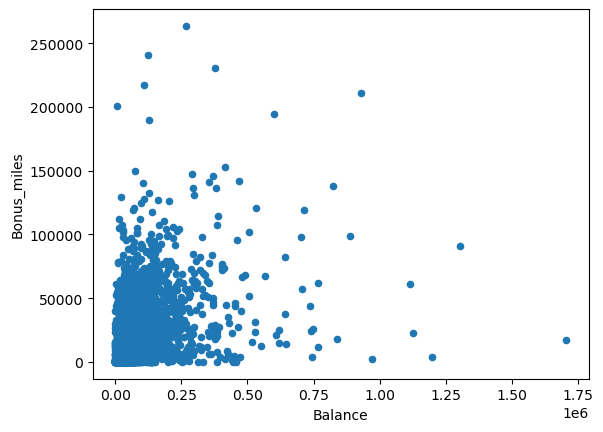

In [34]:
df.plot(kind='scatter', x='Balance', y='Bonus_miles')

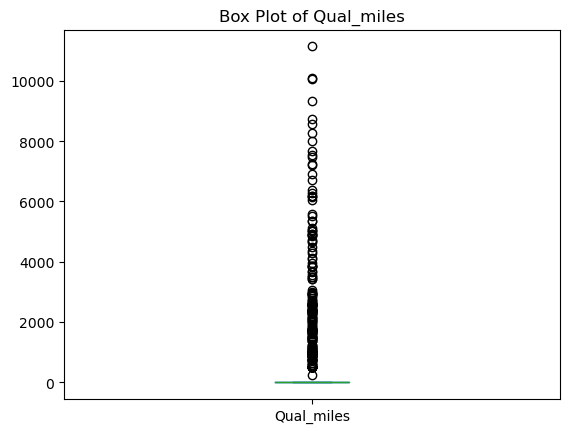

In [35]:
df['Qual_miles'].plot(kind='box')
plt.title('Box Plot of Qual_miles')
plt.show()

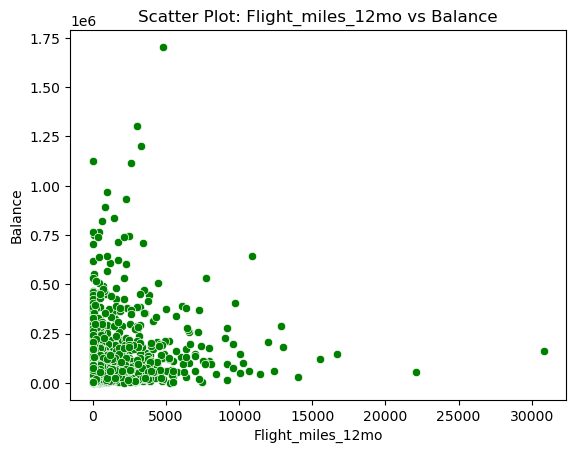

In [36]:
# 3. Bivariate Analysis
sns.scatterplot(x='Flight_miles_12mo', y='Balance', data=df,color='green')
plt.title('Scatter Plot: Flight_miles_12mo vs Balance')
plt.show()


In [37]:
df.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


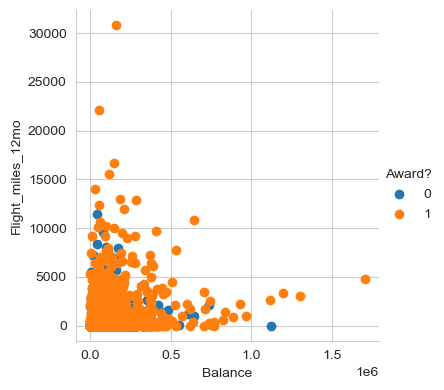

In [38]:
sns.set_style("whitegrid");
sns.FacetGrid(df,hue="Award?",height=4)\
    .map(plt.scatter,'Balance','Flight_miles_12mo')\
    .add_legend()
plt.show()

<Axes: >

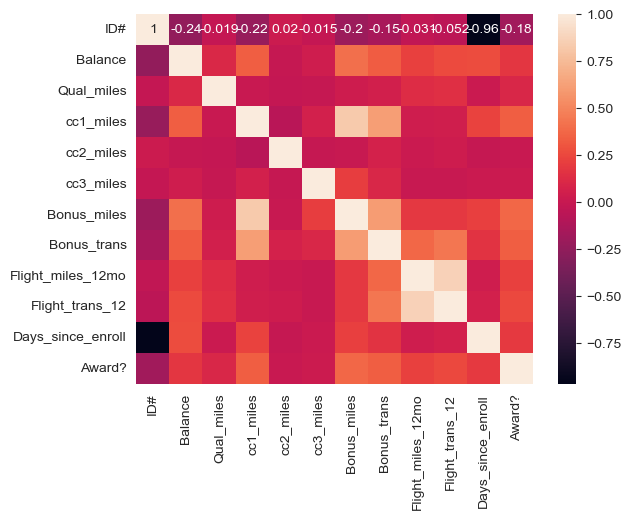

In [39]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)


# 4. Data Pre-processing
# 4.1 Data Cleaning:
Ensure that the dataset is clean and free from any inconsistencies that could affect the model's performance.
Handling Missing Values:
we can use the mean/median/mode imputation here.

#so we also tried for IQR to remove the outliers t=but they were not that effective so we will go for minmaxscaler()

In [47]:
#initially we will perform EDA to analyse the data

#pairplot
import seaborn as sns
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="Award?", height=3);
plt.show()

#pdf and cdf

counts, bin_edges = np.histogram(df['Balance'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
'''
from pdf we can say that approx 90% of data have balance 20000
'''
plt.plot(bin_edges[1:], cdf)
plt.show();


C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_

In [41]:
#initially normalize the dataset
def norm_fun(i):
    x = (i-i.min())/(i.max()-i.min())
    return x


In [42]:
#apply this func on airlines dataset
df_new = norm_fun(df)
b = df_new.describe()
b
#as qual miles is containing NAN values so we will drop it
#df_new.drop(['Qual_miles'],axis=1,inplace=True)

#now all the data is normalized

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,0.500950,0.043172,0.012927,0.264879,0.007252,0.003063,0.065020,0.134906,0.014929,0.025917,0.496330,0.370343
std,0.288747,0.059112,0.069399,0.344230,0.073825,0.048810,0.091590,0.111672,0.045436,0.071569,0.248991,0.482957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.251119,0.010868,0.000000,0.000000,0.000000,0.000000,0.004741,0.034884,0.000000,0.000000,0.280685,0.000000
50%,0.501244,0.025279,0.000000,0.000000,0.000000,0.000000,0.027195,0.139535,0.000000,0.000000,0.493610,0.000000
75%,0.751119,0.054201,0.000000,0.500000,0.000000,0.000000,0.090261,0.197674,0.010092,0.018868,0.697914,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 4.2 Feature Engineering
Create new features to improve the performance of the model.
#we can have the customers which are joined from when and what is there ratio .
this will tell there Loyaltyratio

Example of creating a new feature
#df['Loyalty_Ratio'] = df['Balance'] / df['Days_since_enroll']
 here ist is not necessary to do that


 # Scaling/Normalization:
 Scaling ensures that all features contribute equally to the model, especially important for algorithms like K-means clustering.


In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Balance', 'Qual_miles', 'Flight_miles_12mo','Bonus_miles','Bonus_trans','Flight_trans_12','Days_since_enroll']])

# Convert back to DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=['Balance', 'Qual_miles', 'Flight_miles_12mo','Bonus_miles','Bonus_trans','Flight_trans_12','Days_since_enroll'])
df_scaled

,Balance,Qual_miles,Flight_miles_12mo,Bonus_miles,Bonus_trans,Flight_trans_12,Days_since_enroll
0,-0.451141,-0.186299,-0.328603,-0.702786,-1.104065,-0.362168,1.395454
1,-0.539457,-0.186299,-0.328603,-0.701088,-0.999926,-0.362168,1.379957
2,-0.320031,-0.186299,-0.328603,-0.539253,-0.791649,-0.362168,1.411920
3,-0.583799,-0.186299,-0.328603,-0.689286,-1.104065,-0.362168,1.372208
4,0.239678,-0.186299,1.154932,1.083121,1.499394,0.692490,1.363975
...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.185750,-0.356960,-0.791649,-0.098503,-1.315120
3995,-0.091465,-0.186299,-0.328603,-0.669367,-0.687511,-0.362168,-1.318994
3996,-0.000043,-0.186299,-0.328603,0.343804,-0.375096,-0.362168,-1.315604
3997,-0.185607,-0.186299,0.028531,-0.689286,-1.104065,-0.098503,-1.316088


In [52]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,random_state=42)
y_predicted=km.fit_predict(df)
y_predicted
df['clusters']=y_predicted
km.cluster_centers_

array([[ 1.51935361e+03,  1.88000250e+05,  2.85322489e+02,
         3.05516266e+00,  1.00990099e+00,  1.02970297e+00,
         3.60351358e+04,  1.76506365e+01,  9.97294201e+02,
         2.87835926e+00,  5.03298303e+03,  5.04950495e-01,
        -2.33146835e-15],
       [ 2.13938248e+03,  3.94621468e+04,  1.06846700e+02,
         1.82541641e+00,  1.01542258e+00,  1.00771129e+00,
         1.25122036e+04,  1.01483652e+01,  3.24614744e+02,
         9.79642196e-01,  3.88614374e+03,  3.34053054e-01,
         1.00000000e+00],
       [ 9.44040000e+02,  6.69585040e+05,  5.63880000e+02,
         3.16000000e+00,  1.02000000e+00,  1.06000000e+00,
         5.04167000e+04,  2.03200000e+01,  1.64550000e+03,
         5.64000000e+00,  6.25844000e+03,  8.20000000e-01,
         2.00000000e+00]])

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Example: Selecting specific columns for scaling and clustering
columns_to_scale = ['Balance', 'Qual_miles', 'Flight_miles_12mo', 'Bonus_miles', 'Bonus_trans', 'Days_since_enroll', 'Award?']

# Scale the selected features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[columns_to_scale])

# Fit K-means clustering on the scaled data
km = KMeans(n_clusters=3, random_state=42)
km.fit(df_scaled)

# Inverse transform the cluster centers to the original scale (make sure you use the same columns)
centroids_original = scaler.inverse_transform(km.cluster_centers_)
print("Cluster Centers (original scale):")
print(centroids_original)


Cluster Centers (original scale):
[[ 5.90879303e+04  1.05339931e+02  3.72513769e+02  2.02699733e+04
   1.28485370e+01  4.43407745e+03  1.00000000e+00]
 [ 5.20906596e+04  6.35280899e+01  1.78856846e+02  8.35862880e+03
   8.46317104e+00  3.75914524e+03 -2.60902411e-15]
 [ 2.31561472e+05  6.94126728e+02  2.25140323e+03  5.74256820e+04
   2.56428571e+01  5.26381336e+03  7.35023041e-01]]


In [59]:
#dataframes for the clusters
df1 = df[df.clusters == 0]
df2 = df[df.clusters == 1]
df3 = df[df.clusters == 2]

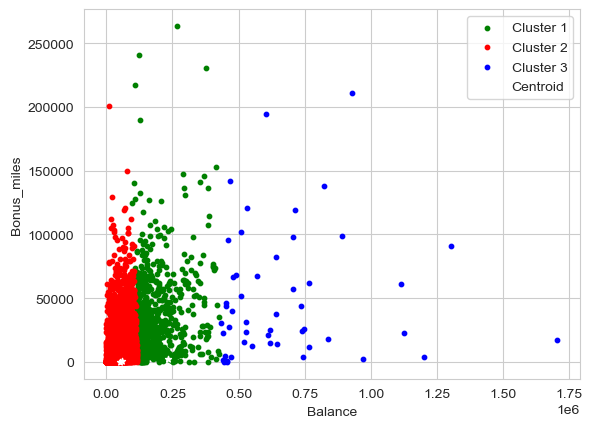

In [60]:
#plot them
#balance and bonus miles
plt.scatter(df1['Balance'], df1['Bonus_miles'], color='green', label='Cluster 1', s=10)
plt.scatter(df2['Balance'], df2['Bonus_miles'], color='red', label='Cluster 2',s=10)
plt.scatter(df3['Balance'], df3['Bonus_miles'], color='blue', label='Cluster 3',s=10)
plt.scatter(centroids_original[:, 0], centroids_original[:, 2], color='white', marker='*', s=20, label='Centroid')
plt.xlabel('Balance')
plt.ylabel('Bonus_miles')
plt.legend()
plt.show()

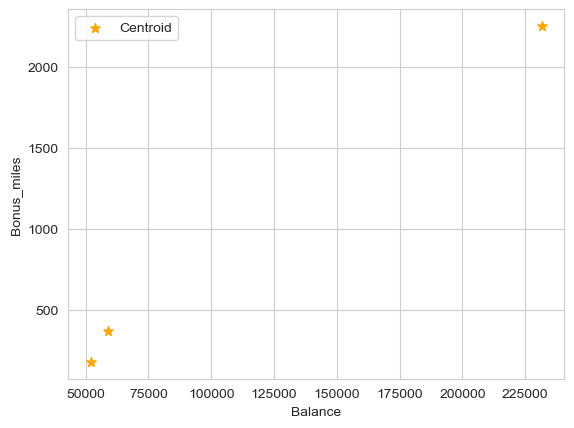

In [61]:
#show cluster centers
plt.scatter(centroids_original[:, 0], centroids_original[:, 2], color='orange', marker='*', s=50, label='Centroid')
plt.xlabel('Balance')
plt.ylabel('Bonus_miles')
plt.legend()
plt.show()

# Elbow curve

In [62]:
#find number of clusters
TWSS=[]
k = list(range(2, 8))
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_new)
    TWSS.append(kmeans.inertia_)

C:\Users\Vaishnavi\AppData\Local\Temp\ipykernel_10996\1625205585.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(k, TWSS, 'ro-',color='blue')


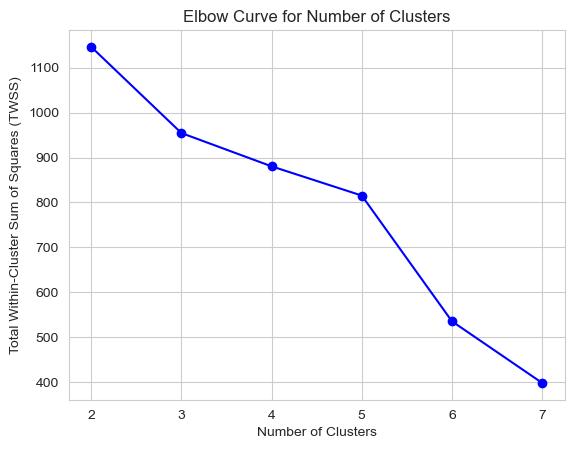

In [63]:
#plot the elbow curve
plt.plot(k, TWSS, 'ro-',color='blue')
plt.xlabel("Number of Clusters")
plt.ylabel("Total Within-Cluster Sum of Squares (TWSS)")
plt.title("Elbow Curve for Number of Clusters")
plt.show()

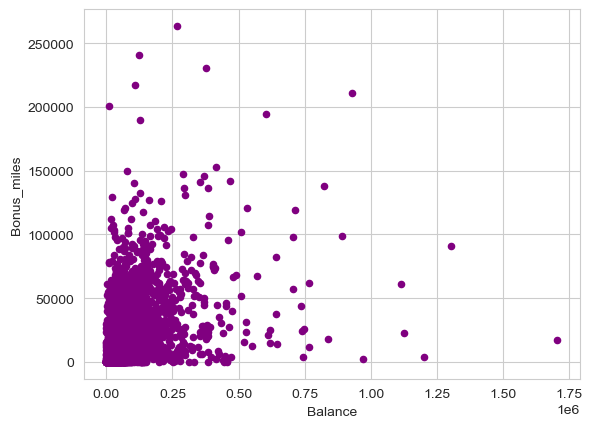

In [64]:
####lets calculate this again
cols = ['Balance', 'Qual_miles', 'Bonus_miles', 'Bonus_trans','Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll']
#scatter plot
plt.scatter(df['Balance'], df['Bonus_miles'],s=20,color='purple')
plt.xlabel('Balance')
plt.ylabel('Bonus_miles')
plt.show()

In [66]:
#data is not scaled, so lets just scale the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_scaled = scaler.fit_transform(df[cols])

In [67]:
#convert back to dataframe
df_scaled = pd.DataFrame(df_scaled, columns=cols)

In [68]:
#apply k-means clustering
km = KMeans(n_clusters=3, random_state=42)
y_predicted = km.fit_predict(df_scaled)

In [69]:
df['cluster'] = y_predicted

In [70]:
#clustercenters
print("Cluster Centers (scaled):")
print(km.cluster_centers_)

Cluster Centers (scaled):
[[0.04222259 0.01349726 0.06544022 0.13639873 0.01463364 0.02457006
  0.51444269]
 [0.02686567 0.01082712 0.04051472 0.11121839 0.01322386 0.02214989
  0.22205537]
 [0.06406554 0.01475267 0.09410907 0.16166412 0.01735782 0.03215382
  0.8051275 ]]


In [71]:
# Inverse transform the cluster centers back to the original scale
centroids_original = scaler.inverse_transform(km.cluster_centers_)
print("Cluster Centers (original scale):")
print(centroids_original)

Cluster Centers (original scale):
[[7.19826729e+04 1.50467497e+02 1.72556037e+04 1.17302905e+01
  4.50964730e+02 1.30221300e+00 4.26878769e+03]
 [4.58016156e+04 1.20700787e+02 1.06831238e+04 9.56478168e+00
  4.07519685e+02 1.17394417e+00 1.84372727e+03]
 [1.09221373e+05 1.64462803e+02 2.48151497e+04 1.39031142e+01
  5.34916090e+02 1.70415225e+00 6.67972751e+03]]


In [72]:
#dataframes for the clusters
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

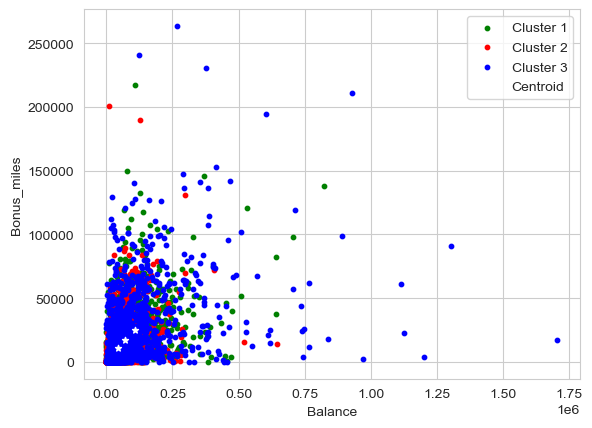

In [73]:
#plot them
#balance and bonus miles
plt.scatter(df1['Balance'], df1['Bonus_miles'], color='green', label='Cluster 1', s=10)
plt.scatter(df2['Balance'], df2['Bonus_miles'], color='red', label='Cluster 2',s=10)
plt.scatter(df3['Balance'], df3['Bonus_miles'], color='blue', label='Cluster 3',s=10)
plt.scatter(centroids_original[:, 0], centroids_original[:, 2], color='white', marker='*', s=20, label='Centroid')
plt.xlabel('Balance')
plt.ylabel('Bonus_miles')
plt.legend()
plt.show()

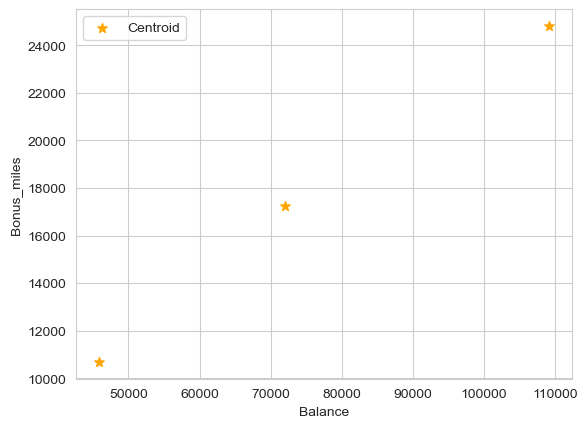

In [74]:
#show cluster centers
plt.scatter(centroids_original[:, 0], centroids_original[:, 2], color='orange', marker='*', s=50, label='Centroid')
plt.xlabel('Balance')
plt.ylabel('Bonus_miles')
plt.legend()
plt.show()

In [77]:
#Elbow Curve
def normalization(column):
    return (column - column.min()) / (column.max() - column.min())

df_norm = normalization(df[cols])

#find number of clusters
TWSS=[]
k = list(range(2, 8))
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)


C:\Users\Vaishnavi\AppData\Local\Temp\ipykernel_10996\1625205585.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(k, TWSS, 'ro-',color='blue')


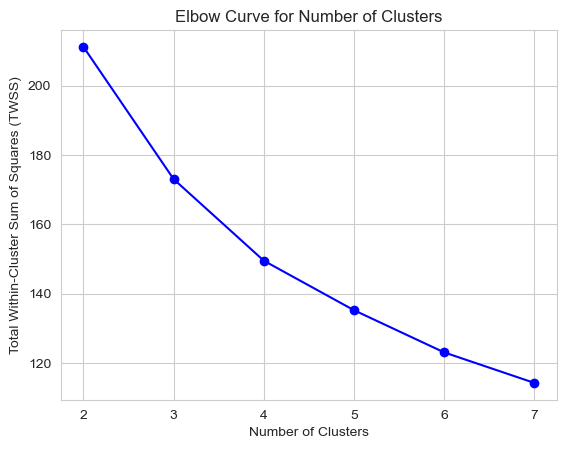

In [78]:
#plot the elbow curve
plt.plot(k, TWSS, 'ro-',color='blue')
plt.xlabel("Number of Clusters")
plt.ylabel("Total Within-Cluster Sum of Squares (TWSS)")
plt.title("Elbow Curve for Number of Clusters")
plt.show()